<a href="https://colab.research.google.com/github/mauroschramm/nlp/blob/main/Trabalho_NLP_AULA_1_Classificador_Imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercício de Chatbots - Classificador de sentimentos em comentários sobre  filmes**

Professor Cristiano Roberto Franco

Alunos:
*   Bárbara Sabrina Rovigo Salvador
*   João Paulo Poffo
*   Mauro Schramm






1. Limpar dados do arquivo imdb.csv, com stopwords, regex, stem ou lemma, (nltk ou spacy)
2. Criar um classificador (não bayes)
3. Calcular a acurácia do seu classificador com testes

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")
{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

Comparar os resultados (acurácia) do sia com os do seu classificador

Um notebook do jupyter postado em seu github (link na atividade do ava)

In [3]:
# Lendo os dados do imdb
import pandas as pd
import zipfile

def unquote(text):
    strpos = 0
    endpos = len(text) - 1
    while '"' == text[strpos] == text[endpos]:
      strpos = strpos + 1
      endpos = endpos
    if strpos:
      return text[strpos:endpos]
    return text

data = {}

with zipfile.ZipFile("imdb.zip") as z:
  with z.open("imdb.csv", mode='r') as f:
    l = f.readline() # pula o cabeçalho
    l = f.readline()
    pos = 0
    while l:
      cl = l.decode('utf-8').rstrip(";\r\n")
      ccl = unquote(cl)
      #print('***', (strpos, endpos), ccl, '***')
      si = ccl.rindex(',')
      #print(ccl[:si])
      #print(ccl[si+1:])
      data[pos] = [unquote(ccl[:si]), unquote(ccl[si+1:])]
      pos = pos + 1

      l = f.readline()

#df = pd.DataFrame(columns=['review', 'sentiment'])
#df.append(data, orient='index') #ignore_index=True)

df = pd.DataFrame.from_dict(data, columns=['review', 'sentiment'], orient='index')

df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's """"Love in the Time of Money"""" ...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Análise do balanceamento da base dos sentimentos positivos e negativos

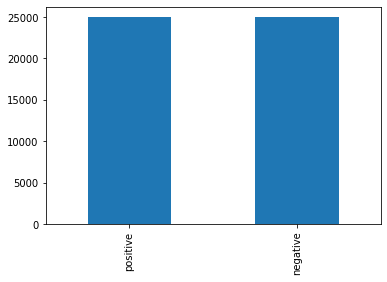

In [4]:
df.sentiment.value_counts().plot.bar()

Nuvem de palavras para análise de stop words

Nuvem de palavras dos sentimentos negativos


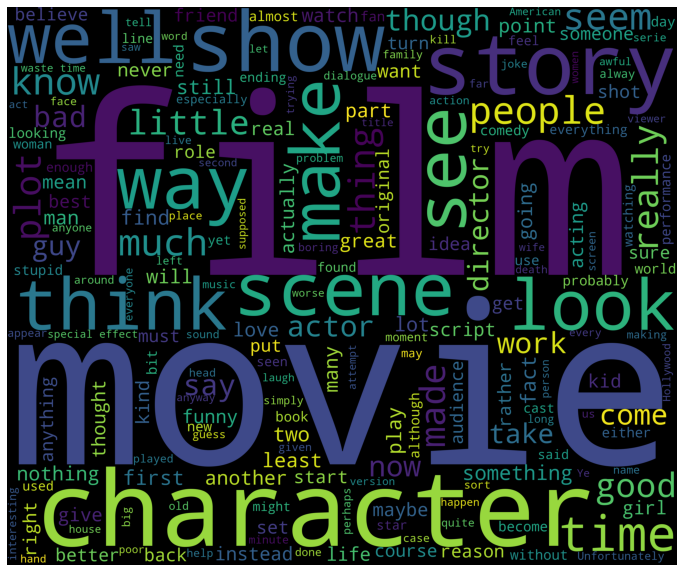

Nuvem de palavras dos sentimentos positivos


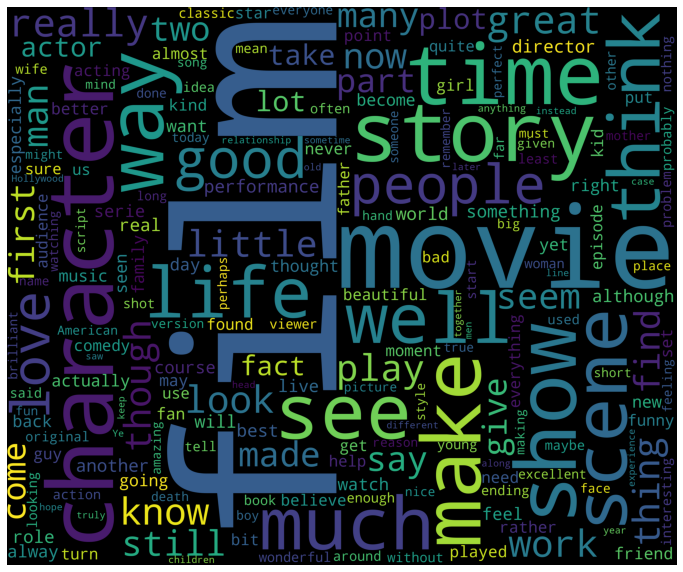

In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#dataframe com sentimentos negativos
df_negative=df[df['sentiment']=='negative']
words_negative = ' '.join(df_negative['review'])

#dataframe com sentimentos positivos
df_positive=df[df['sentiment']=='positive']
words_positive = ' '.join(df_positive['review'])


# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["br","get", "end", "got", "of", "one", "go", "goes","even"])


# gerar uma wordcloud
wordcloud_negative = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words_negative)

wordcloud_positive = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words_positive)                     

# mostrar a imagem final
plt.figure(1,figsize=(12, 12))
print("Nuvem de palavras dos sentimentos negativos")
plt.imshow(wordcloud_negative)
plt.axis('off')
plt.show()

plt.figure(1,figsize=(12, 12))
print("Nuvem de palavras dos sentimentos positivos")
plt.imshow(wordcloud_positive)
plt.axis('off')
plt.show()

https://www.kaggle.com/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews

1. StopWords: É o processo de eliminar palavras que tenham pouco ou nenhum valor para o NLP, no sentido de diminuir a quantidade de operações de análise posteriores. Depende de uma lista já existente.

2. Stemming: É o processo de determinar a raiz de uma palavra, buscando entender seu significado. Ex: amig: amigo, amiga, amigão

3. Lemmatization: É um processo mais complexo do que o stemming, que busca reduzir uma palavra à base de seu significado, ou seja, enquanto o stemming retorna uma raiz, a lemmatization retorna sempre uma palavra válida.Ex: amigo: amigo, amiga, amigão | ter: tinha, tenho, tiver, tem

4. Regex: São representações para encontrar padrões de caracteres em um texto

**Dividir o dataframe de negativos e positivos igualmente entre treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split
def dividir_dados_para_treino_e_teste(dados):
    percentual_treino = 0.75
    treino, teste = train_test_split(dados, train_size=percentual_treino)
    return treino, teste

df_treino_negative, df_teste_negative = dividir_dados_para_treino_e_teste(df_negative)
df_treino_positive, df_teste_positive = dividir_dados_para_treino_e_teste(df_positive)

df_treino = pd.concat([df_treino_negative, df_treino_positive], ignore_index=True)
df_teste = pd.concat([df_teste_negative, df_teste_positive], ignore_index=True)

text_train, y_train = df_treino.review, df_treino.sentiment
text_teste, y_teste = df_teste.review, df_teste.sentiment

BAG OF WORDS: Essa linha de código contém duas funções, a fit que é responsável por extrair nossos parâmetros, ou seja as palavras presentes no texto. A outra função a transform é responsável por contabilizar em um vector quantas vezes cada palavra está sendo usada ao longo dos nossos dados de treino.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#vect = CountVectorizer().fit(text_train)
#x_train = vect.transform(text_train)

vect = CountVectorizer().fit(pd.concat([text_train, text_teste], ignore_index=True))
x_train = vect.transform(text_train)
x_test = vect.transform(text_teste)

print(vect.vocabulary_)

['00', '000', '00000000000', '0000000000001', '00000001', '00001', '00015', '000dm', '000s', '001', '003830', '006', '0069', '007', '0079', '007s', '0080', '0083', '009', '0093638', '00am', '00o', '00pm', '00s', '00schneider', '01', '0126', '0148', '01pm', '02', '020410', '0230', '029', '03', '039', '04', '041', '044', '05', '050', '05nomactr', '06', '0615', '06th', '07', '07b', '08', '087', '089', '08th', '09', '0and', '0f', '0ne', '0r', '0s', '0tt', '10', '100', '1000', '10000', '1000000', '10000000000', '10000000000000', '10000th', '1000lb', '1000s', '1000th', '1001', '1004', '100b', '100bt', '100ft', '100ibs', '100k', '100m', '100miles', '100min', '100mins', '100mph', '100s', '100th', '100times', '100x', '100yards', '101', '101st', '102', '102nd', '103', '104', '1040', '1040a', '1040s', '105', '1050', '105lbs', '106', '106min', '107', '108', '1080', '1080p', '109', '10_', '10am', '10ft', '10ish', '10k', '10lines', '10mil', '10min', '10mins', '10minutes', '10p', '10pm', '10s', '10st

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)

Tfidf_vect.fit(pd.concat([text_train, text_teste], ignore_index=True))
x_train = Tfidf_vect.transform(text_train)
x_test = Tfidf_vect.transform(text_teste)

print(Tfidf_vect.vocabulary_)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
nltk.download('popular')

from nltk.stem.snowball import SnowballStemmer
lang = 'english'
stemmer = SnowballStemmer(lang, ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

stemmed_count_vect = StemmedCountVectorizer(stop_words=lang)
text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect),('tfidf', TfidfTransformer())])

text_mnb_stemmed = text_mnb_stemmed.fit(pd.concat([text_train, text_teste]))
x_train = text_mnb_stemmed.transform(text_train)
x_test = text_mnb_stemmed.transform(text_teste)

print(stemmed_count_vect.vocabulary_)


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [ ]:
#x_test = vect.transform(text_teste)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(37500, 101895)
(12500, 101895)


Fonte:https://blog.novatics.com.br/como-construir-um-identificador-de-sentimentos-em-python-e2afbaade023
O atributo cross-validation score que indica a precisão da função gerada pelo logistic regression. Ou seja, esse atributo indica uma precisão de quase 90% ao indicar se uma review foi positiva ou negativa.

Nesta parte estamos realizando duas operações. A primeira, estamos importando a função LogisticRegression e a cross_val_score do sklearn para assim podermos treinar nosso modelo. Em seguida estaremos verificando qual o melhor valor para esse atributo C, que será explicado mais a frente. Daremos algumas opções para esse atributo e aplicando outra função do sklearn conseguimos identificar que o melhor valor será 0.1. Assim nosso modelo terá um score conforme mostra a imagem abaixo:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
#scores = cross_val_score(LogisticRegression(), x_train, y_train, cv=5)

from sklearn.model_selection import GridSearchCV
#param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
#grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

log_reg = LogisticRegression(C=0.1)

log_reg.fit(x_train, y_train)

#print("Best cross validation score: {:.2f}".format(log_reg.best_score_))
#print("Best parameters ", log_reg.best_params_)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

# predict the labels on validation dataset
predictions = log_reg.predict(x_test)

# Use accuracy_score function to get the accuracy
print("Logistic Accuracy Score -> ", accuracy_score(predictions, y_teste)*100)



import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

pred_sia = text_teste.apply(lambda row: 'positive' if sia.polarity_scores(row)['compound'] > 0 else 'negative')

print("SIA Accuracy Score -> ", accuracy_score(pred_sia, y_teste)*100)


#y_professor = text_teste

#{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}



Logistic Accuracy Score ->  89.536
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
SIA Accuracy Score ->  69.67999999999999



**Resultado do exercício:**

Comparação da acurácia do SIA com o classificador usando regressão logística:

Logistic Accuracy Score ->  **89.536**

SIA Accuracy Score ->  **69.68**